credits: https://www.tensorflow.org/hub/tutorials/tf2_text_classification

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow_hub as tfhb

In [2]:
train, test = tfds.load(name='imdb_reviews', split=['train', 'test'], as_supervised=True, batch_size= -1)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCCHG7/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCCHG7/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCCHG7/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train

(<tf.Tensor: shape=(25000,), dtype=string, numpy=
 array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
        b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I

In [15]:
X_train, y_train = tfds.as_numpy(train)
X_test, y_test = tfds.as_numpy(test)

In [16]:
X_train

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [11]:
tf_pretrained_model_url = 'https://tfhub.dev/google/nnlm-en-dim50/2'
model = tf.keras.models.Sequential([
                             tfhb.KerasLayer(tf_pretrained_model_url, input_shape=[], dtype=tf.string, trainable=True),
                             tf.keras.layers.Dense(units=32, activation='relu'),
                             tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 32)                1632      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 48,192,265
Trainable params: 48,192,265
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=10, 
    restore_best_weights=True,
)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size=64, callbacks=[early_stopping])

Epoch 1/50
274/274 [==============================] - 10s 35ms/step - loss: 0.0677 - accuracy: 0.9956 - val_loss: 1.6631 - val_accuracy: 0.8500
Epoch 2/50
274/274 [==============================] - 10s 35ms/step - loss: 0.0665 - accuracy: 0.9957 - val_loss: 1.6631 - val_accuracy: 0.8500
Epoch 3/50
274/274 [==============================] - 9s 34ms/step - loss: 0.0692 - accuracy: 0.9955 - val_loss: 1.6631 - val_accuracy: 0.8500
Epoch 4/50
274/274 [==============================] - 10s 35ms/step - loss: 0.0695 - accuracy: 0.9955 - val_loss: 1.6631 - val_accuracy: 0.8500
Epoch 5/50
274/274 [==============================] - 9s 35ms/step - loss: 0.0611 - accuracy: 0.9960 - val_loss: 1.6631 - val_accuracy: 0.8500
Epoch 6/50
274/274 [==============================] - 9s 34ms/step - loss: 0.0719 - accuracy: 0.9953 - val_loss: 1.6631 - val_accuracy: 0.8500
Epoch 7/50
274/274 [==============================] - 9s 35ms/step - loss: 0.0622 - accuracy: 0.9959 - val_loss: 1.6631 - val_accuracy: 0.8

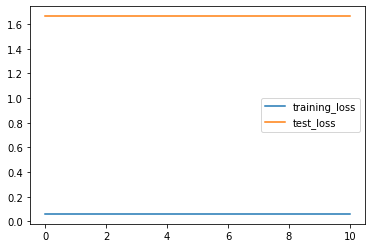

In [26]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

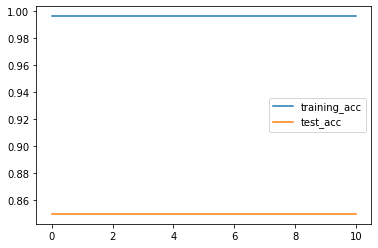

In [27]:
plt.plot(history.history['accuracy'], label='training_acc')
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend()
plt.show()

In [28]:
predictions = model.evaluate(X_test, y_test)
predictions

782/782 [==============================] - 3s 4ms/step - loss: 1.7743 - accuracy: 0.8400


[1.7743096351623535, 0.8399999737739563]